<a name="top"></a><img src="source/SpinalHDL.png" alt="SpinalHDL based on Scala" style="width:320px;" />

  Before running Spinal HDL code, be sure to load SpinalHDL Libraries  
**Note** : This may be a little slow when the first time load, please wait a moment to download Lib from remote.)

In [ ]:
val path = System.getProperty("user.dir") + "/source/load-spinal.sc"
interp.load.module(ammonite.ops.Path(java.nio.file.FileSystems.getDefault().getPath(path)))

## Rules

- **Spinal never force IO Bundle**
 ```scala
 class Top extends Component{
   val a = in UInts(8 bits)
   val IO = new Bundle{        //IO bundle is not necessary
     val b = in UInts(8 bits) 
   }
 }
 ```
- **Spinal never force instantiation by Module keywords**
 ```scala 
  class Top extends Component{
     val cpu = new MyCpu(mycpuconfig) //no need Module(new Mycpu(...))
  }
 ```
- **Spinal nerver remove unused named signals**

  SpinalHDL left theme to EDA tools, somethimes a named unused signals is convinent for wave debug.  
  It will not cause additional problems, EDA tools will optimize it.
 ```scala 
  class Top extends Component{
     val unused1 = Bits(8 bits)
     val unused2 = unsued1
  }
  ```
  but output signal without driving will not allow ,this will cause exception
  ```scala 
  class Top extends Component{
     val unassigned = out Bits(8 bits) //not allow, cuase exception
  }
  ```

SpinalHDL will never make any form restrictions， **SpinalHDL emphasize same in essence, not in form**  
io signal allow appear anywhere under the scope of component.

**So, Why Not:**

In [ ]:
class WhyNot extends Component{
   val ram = Mem(Bits(4 bit),16)
   out(ram.readWriteSync(in UInt(4 bit),in Bits(4 bit),in Bool(),in Bool()))
   out(ram.readWriteSync(in UInt(4 bit),in Bits(4 bit),in Bool(),in Bool()))
}
showRtl(new WhyNot)

## SpinlHDL Data Type
The language provides 5 base types and 2 composite types that can be used.

Base types: Bool , Bits , UInt for unsigned integers, SInt for signed integers and Enum.

Composite types: Bundle and Vec.

![image.png](attachment:image.png)

Finally, a special type is available for checking equality between a BitVector and a bits constant that contains holes (don’t care values). An example is shown below:
```scala
val myBits  = Bits(8 bits)
val itMatch = myBits === M"00--10--" // - don't care value
```

In [ ]:
class Top extends Component{
  val myBits  = Bits(8 bits)
  val itMatch = myBits === M"00--10--" // - don't care value
}
showRtl(new Top)

## Bool
Description
The Bool type corresponds to a boolean value (True or False).

Declaration：   
The syntax to declare a boolean value is as follows: (everything between [] is optional)

Syntax | Description |Return
-|-|-
Bool[()] |  Create a Bool  |Bool
True | Create a Bool assigned with true | Bool
False | Create a Bool assigned with false |Bool
Bool(value: Boolean) | Create a Bool assigned with a Scala Boolean(true, false) | Bool


In [ ]:
class Top extends Component{
  val myBool_1 = Bool()          // Create a Bool
  myBool_1    := False         // := is the assignment operator

  val myBool_2 = False         // Equivalent to the code above

  val myBool_3 = Bool(5 < 12)  // Use a Scala Boolean to create a Bool
  val myBool_4 = Bool("Spinal" == "Scala")  // Use a Scala Boolean to create a Bool
}
showRtl(new Top)

creat Rise-edge or Fall-edge from level-signal
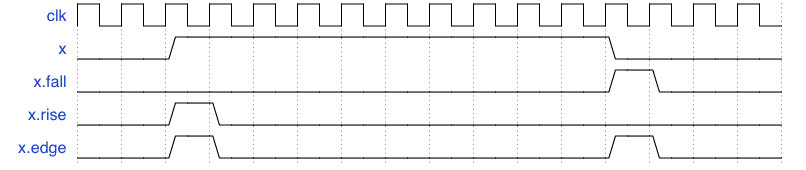

In [ ]:
class Top extends Component{
  val x = Bool()          
  val pulse1 = x.fall()  
  val pulse2 = x.rise()
  val pulse3 = x.edge()
}
showRtl(new Top)

More method of Bool (see [Bool](https://spinalhdl.github.io/SpinalDoc-RTD/SpinalHDL/Data%20types/bool.html))

  
   Operator              | Description                                                   |Return type
  -|-|-
  x.edge\[()\]          | Return True when x changes state                              |Bool
  x.edge(initAt: Bool)  | Same as x.edge but with a reset value                         |Bool
  x.rise\[()\]          | Return True when x was low at the last cycle and is now high  |Bool
  x.rise(initAt: Bool)  | Same as x.rise but with a reset value                         |Bool
  x.fall\[()\]          | Return True when x was high at the last cycle and is now low  |Bool
  x.fall(initAt: Bool)  | Same as x.fall but with a reset value                         |Bool
  x.edges\[()\]         | Return a bundle (rise, fall, toggle)                          |BoolEdges
  x.edges(initAt: Bool) | Same as x.edges but with a reset value                        |BoolEdges
  x.asBits              | Binary cast to Bits                                           |Bits(w(x) bits)
  x.asUInt              | Binary cast to UInt                                           |UInt(w(x) bits)
  x.asSInt              | Binary cast to SInt                                           |SInt(w(x) bits)
  x.asUInt(bitCount)    | Binary cast to UInt and resize                                |UInt(bitCount bits)
  x.asBits(bitCount)    | Binary cast to Bits and resize                                |Bits(bitCount bits)         
  x ## y | Concatenate, x->high, y->low | Bits(w(x) + w(y) bits)
  !x                 |Logical NOT                |Bool
  x && y <br> x&y   |Logical AND                |Bool
  x \|\|y <br> x\|y     |Logical OR                 |Bool
  x \^ y             |Logical XOR                |Bool
  x.set\[()\]        |Set x to True              |
  x.clear\[()\]      |Set x to False             |
  x.setWhen(cond)    |Set x when cond is True    |Bool
  x.clearWhen(cond)  |Clear x when cond is True  |Bool
  x === y  | Equality    | Bool
  x =/= y  | Inequality  | Bool       

In [ ]:
class Top extends Component{
  val x = Bool()          
  val y = UInt(8 bits)
  when(x.edge){
      y.setAll
  }.otherwise{
      y.clearAll
  }
}
showRtl(new Top)

## Bits
The Bits type corresponds to a vector of bits that does not convey any arithmetic meaning.
The syntax to declare a bit vector is as follows: (everything between [] is optional)

  Syntax                                  | Description                                                                   | Return
  -|-|-                                                                                                                    
  Bits \[()\]                             | Create a BitVector, bits count is inferred                                    | Bits
  Bits(x bits)                            | Create a BitVector with x bits                                                | Bits
  B(value: Int\[, x bits\])               | Create a BitVector with x bits assigned with \'value\'                        | Bits
  B\"\[\[size\'\]base\]value\"            | Create a BitVector assigned with \'value\' (Base: \'h\', \'d\', \'o\', \'b\') | Bits
  B(\[x bits,\] `element <element>`, ...) | Create a BitVector assigned with the value specified by elements              | Bits 

In [ ]:
class Top extends Component{ 
  val x = Bits(8 bits)
  val y = x(6 downto 2)
}
showRtl(new Top)

In [ ]:
class Top extends Component{ 
// Declaration
val myBits  = Bits()     // the size is inferred
val myBits1 = Bits(32 bits)
val myBits2 = B(25, 8 bits)
val myBits3 = B"8'xFF"   // Base could be x,h (base 16)
                         //               d   (base 10)
                         //               o   (base 8)
                         //               b   (base 2)
val myBits4 = B"1001_0011"  // _ can be used for readability

// Element
val myBits5 = B(8 bits, default -> True) // "11111111"
val myBits6 = B(8 bits, (7 downto 5) -> B"101", 4 -> true, 3 -> True, default -> false ) // "10111000"
val myBits7 = Bits(8 bits)
myBits7 := (7 -> true, default -> false) // "10000000" (For assignement purposes, you can omit the B)
myBits  := B(31,8 bits)
}
showRtl(new Top)

More method of Bits (see [Bits](https://spinalhdl.github.io/SpinalDoc-RTD/SpinalHDL/Data%20types/bits.html#)) 

  Operator                    | Description                              | Return type
  -|-|-                                                                                                                    
  \~x                        |Bitwise NOT                               |Bits(w(x) bits)
  x & y                       |Bitwise AND                               |Bits(w(xy) bits)
  x \| y                     |Bitwise OR                                |Bits(w(xy) bits)
  x \^ y                     |Bitwise XOR                               |Bits(w(xy) bits)
  x.xorR                      |XOR all bits of x                         |Bool
  x.orR                       |OR all bits of x                          |Bool
  x.andR                      |AND all bits of x                         |Bool
  x \>\> y                  |Logical shift right, y: Int               |Bits(w(x) - y bits)
  x \>\> y                  |Logical shift right, y: UInt              |Bits(w(x) bits)
  x \<\< y                  |Logical shift left, y: Int                |Bits(w(x) + y bits)
  x \<\< y                  |Logical shift left, y: UInt               |Bits(w(x) + max(y) bits)
  x \|\>\> y               |Logical shift right, y: Int/UInt          |Bits(w(x) bits)
  x \|\<\< y               |Logical shift left, y: Int/UInt           |Bits(w(x) bits)
  x.rotateLeft(y)             |Logical left rotation, y: UInt/Int        |Bits(w(x) bits)
  x.rotateRight(y)            |Logical right rotation, y: UInt/Int       |Bits(w(x) bits)
  x.clearAll\[()\]          |Clear all bits                            |   
  x.setAll\[()\]            |Set all bits                              |    
  x.setAllTo(value: Boolean)  |Set all bits to the given Boolean value   |   
  x.setAllTo(value: Bool)     |Set all bits to the given Bool value      |   
  x === y   |Equality                    | Bool
  x =/= y   |Inequality                  | Bool
  x.asBits  | Binary cast to Bits        |Bits(w(x) bits)
  x.asUInt  | Binary cast to UInt        |UInt(w(x) bits)
  x.asSInt  | Binary cast to SInt        |SInt(w(x) bits)
  x.asBools | Cast to an array of Bools  |Vec(Bool, w(x))
  B(x: T)   | Cast Data to Bits          | Bits(w(x) bits)
  x(y)                       | Readbit, y: Int/UInt                                       | Bool
  x(hi,lo)                   | Read bitfield, hi: Int, lo: Int                            | Bits(hi-lo+1 bits)
  x(offset,width bits)       | Read bitfield, offset: UInt, width: Int                    | Bits(width bits)
  x(`range <range>`)         | Read a range of bit. Ex : myBits(4 downto 2)               | Bits(range bits)
  x(y) := z                  | Assign bits, y: Int/UInt                                   | Bool
  x(offset, width bits) := z | Assign bitfield, offset: UInt, width: Int                  | Bits(width bits)
  x(`range <range>`) := z    | Assign a range of bit. Ex : myBits(4 downto 2) := B"010" | Bits(range bits)
  x.getWidth               |Return bitcount                                                                | Int
  x.range                  |Return the range (x.high downto 0)                                             | Range
  x.high                   |Return the upper bound of the type x                                           | Int
  x.msb                    |Return the most significant bit                                                | Bool
  x.lsb                    |Return the least significant bit                                               | Bool
  x \#\# y                 |Concatenate, x-\>high, y-\>low                                                 | Bits(w(x) + w(y) bits)
  x.subdivideIn(y slices)  |Subdivide x in y slices, y: Int                                                | Vec(Bits, y)
  x.subdivideIn(y bits)    |Subdivide x in multiple slices of y bits, y: Int                               | Vec(Bits, w(x)/y)
  x.resize(y)              |Return a resized copy of x, if enlarged, it is filled with zero, y: Int        | Bits(y bits)
  x.resized                |Return a version of x which is allowed to be automatically resized were needed | Bits(w(x) bits)
  x.resizeLeft(y)          |Resize by keeping MSB at the same place, y:Int                                 | Bits(y bits)      

In [ ]:
class Top extends Component{
  val cond       = in Bool()
  val bits_8bits = in Bits(8 bits)
  // Bitwise operator
  val a, b, c = Bits(32 bits)
  c := ~(a & b) //  Inverse(a AND b)
  
  val all_1 = a.andR // Check that all bits are equal to 1
  
  // Logical shift
  val bits_10bits = bits_8bits << 2  // shift left (results in 10 bits)
  val shift_8bits = bits_8bits |<< 2 // shift left (results in 8 bits)
  
  // Logical rotation
  val myBits = bits_8bits.rotateLeft(3) // left bit rotation
  
  // Set/clear
  val d = B"8'x42"
  when(cond){
    d.setAll() // set all bits to True when cond is True
  } 
}
showRtl(new Top)    

In [ ]:
class Top extends Component{
  val myBits = in Bits(8 bits)
  // cast a Bits to SInt
  val mySInt = myBits.asSInt

  // create a Vector of bool
  val myVec = myBits.asBools

  // Cast a SInt to Bits
  val myBits2 = B(mySInt)
}
showRtl(new Top)

## UInt/SInt
The UInt/SInt type corresponds to a vector of bits that can be used for signed/unsigned integer arithmetic.
The syntax to declare an integer is as follows: (everything between [] is optional)

 
more UInt/SInt will description at **[2.4-Spinal-core-FixPoint.ipynb](2.4-Spinal-core-FixPoint.ipynb)**

In [ ]:
class Top extends Component{
  val myUInt,myUInt1,myUInt2,myUInt3,myUInt4,myUInt5,myUInt6,myUInt7,myUInt8,myUInt9 = UInt(8 bits)
  myUInt  := U(2,8 bits)
  myUInt1 := U(2)
  myUInt2 := U"0000_0101"  // Base per default is binary => 5
  myUInt3 := U"h1A"        // Base could be x (base 16)
                          //               h (base 16)
                          //               d (base 10)
                          //               o (base 8)
                          //               b (base 2)
  myUInt4 := U"8'h1A"
  myUInt5 := 2             // You can use scala Int as literal value

  val myBool0 = myUInt === U(7 -> true,(6 downto 0) -> false)
  val myBool1 = myUInt === U(myUInt.range -> true)

  // For assignement purposes, you can omit the U/S, which also alow the use of the [default -> ???] feature
  myUInt6 := (default -> true)                        //Assign myUInt with "11111111"
  myUInt7 := (myUInt.range -> true)                   //Assign myUInt with "11111111"
  myUInt8 := (7 -> true, default -> false)            //Assign myUInt with "10000000"
  myUInt9 := ((4 downto 1) -> true, default -> false) //Assign myUInt with "00011110"
}
showRtl(new Top)

In [ ]:
class Top extends Component{
  val mySInt_1,mySInt_2 = in SInt(8 bits)
  val myUInt_8bits = in UInt(8 bits)
  val myBool0,myBool1 = out Bool()
  // Comparaison between two SInt
  myBool0 := mySInt_1 > mySInt_2

  // Comparaison between a UInt and a literal
  myBool1 := myUInt_8bits >= U(3, 8 bits)

  when(myUInt_8bits === 3){
  
  } 
}
showRtl(new Top)

## SpinalEnum
The Enumeration type corresponds to a list of named values.

## Bundle 
The Bundle is a composite type that defines a group of named signals (of any SpinalHDL basic type) under a single name.

A Bundle can be used to model data structures, buses and interfaces.

For more information, see **[3.1-Spinal-lib-flow-stream.ipynb](3.1-Spinal-lib-flow-stream.ipynb)**

In [ ]:
case class myBundle extends Bundle {
  val bundleItem0 = AnyType
  val bundleItem1 = AnyType
  val bundleItemN = AnyType
}

## Vec
A Vec is a composite type that defines a group of indexed signals (of any SpinalHDL basic type) under a single name.

In [ ]:
class Top extends Component {
  // Create a vector of 2 signed integers
  val myVecOfSInt = Vec(SInt(8 bits),2)
  myVecOfSInt(0) := 2
  myVecOfSInt(1) := myVecOfSInt(0) + 3

  // Create a vector of 3 different type elements
  val myVecOfMixedUInt = Vec(UInt(3 bits), UInt(5 bits), UInt(8 bits))

  val x,y,z = UInt(8 bits)
  val myVecOf_xyz_ref = Vec(x,y,z)

  // Iterate on a vector
  for(element <- myVecOf_xyz_ref){
    element := 0   //Assign x,y,z with the value 0
  }

  // Map on vector
  myVecOfMixedUInt.map(_ := 0) // assign all element with value 0

  // Assign 3 to the first element of the vector
  myVecOf_xyz_ref(1).allowOverride := 3
}
showRtl(new Top)

## List/Array in Spinal
Many times you need to instantiate multiple DUTs, List/Array may be a good choice to implement that.

### A casCadeFilter Example

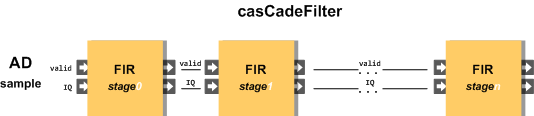

In [ ]:
class FIR extends Component{
    val fi = slave Flow(SInt(8 bits))
    val fo = master Flow(SInt(8 bits)) 
    
    fo << fi.stage()
    
    def -->(that: FIR):FIR = {
        this.fo >> that.fi 
        that
    }
}

class casCadeFilter extends Component{
    val fi = slave Flow(SInt(8 bits))
    val fo = master Flow(SInt(8 bits))
    
    val Firs = List.fill(4)(new FIR)
    
    Firs(0) --> Firs(1) --> Firs(2) --> Firs(3) 
  //Firs(0).-->(Firs(1)).-->(Firs(2)).-->(Firs(3))  //scala Infix expression excute from left to right 
    Firs(0).fi << fi
    fo << Firs(3).fo   
}
showRtl(new casCadeFilter)

For parametric design, you can't link theme one by one `Firs(0) --> Firs(1) --> ....  --> Firs(n)`. 

The better way is to use the fold or reduce method to automate them `Firs.reduceLeft(_-->_)`

In [ ]:
class casCadeFilter(firNumbers: Int) extends Component{
    val fi = slave Flow(SInt(8 bits))
    val fo = master Flow(SInt(8 bits))
    
    val Firs = List.fill(firNumbers)(new FIR)
    
    Firs.reduceLeft(_-->_)     //you can also connnect like this 
    
    Firs(0).fi << fi
    fo << Firs(firNumbers-1).fo   
}
showRtl(new casCadeFilter(8))

some interesting  method of List/Array

- `foldLeft()()`
- `reduceLeft()`
- `foldRight()()`
- `reduceRight()`

In [ ]:
(1 to 10).foldLeft(0)((a,b)=>{println(s"$a-->$b");b})

In [ ]:
(1 to 10).reduceLeft((a,b)=>{println(s"$a-->$b");b})

In [ ]:
(1 to 10).foldRight(11)((a,b)=>{println(s"$a-->$b");a})

In [ ]:
(1 to 10).reduceRight((a,b)=>{println(s"$a-->$b");a})